<a href="https://colab.research.google.com/github/Aminfaraji/ABINetpaddleocr/blob/main/ABINetpaddleocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !nvidia-smi
# !pip install xformers==v0.0.22
# !pip install mmcv-full==1.3.13 -f https://download.openmmlab.com/mmcv/dist/cu102/torch1.9.0/index.html


In [ ]:
# !python -m pip install paddlepaddle-gpu==2.4.1.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
# !python -m pip install paddlepaddle-gpu==2.5.2.post102 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!python3 -m pip install paddlepaddle-gpu==2.6.1.post120 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!git clone https://github.com/PaddlePaddle/PaddleOCR.git
%cd /content/PaddleOCR
!pip install -r requirements.txt

In [ ]:
%cd /content/PaddleOCR
!mkdir pretrained_model
%cd pretrained_model/
# !unzip /content/drive/MyDrive/IDPL2.zip
!wget https://paddleocr.bj.bcebos.com/rec_r45_abinet_train.tar
!tar -xf rec_r45_abinet_train.tar && rm -rf rec_r45_abinet_train.tar

In [ ]:
!rm -rf /content/PaddleOCR/train_data

In [ ]:
# !mkdir /content/PaddleOCR/train_data
# !unzip /content/drive/MyDrive/IDPL-PFOD2-dataset/train.zip -d /content/PaddleOCR/train_data
# !unzip /content/drive/MyDrive/IDPL-PFOD2-dataset/val.zip -d /content/PaddleOCR/train_data
!cp /content/drive/MyDrive/IDPL-PFOD2-dataset/val.txt -r /content/PaddleOCR/train_data
!cp /content/drive/MyDrive/IDPL-PFOD2-dataset/train.txt -r /content/PaddleOCR/train_data


In [22]:
import cv2
import os
#from imutils import perspective
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from imutils import perspective

In [27]:
!python3 tools/train.py -c /content/PaddleOCR/pretrained_model/rec_r45_abinet_train/config.yml -o Global.pretrained_model=/content/PaddleOCR/pretrained_model/rec_r45_abinet_train/best_accuracy

Traceback (most recent call last):
  File "/content/PaddleOCR/tools/train.py", line 252, in <module>
    config, device, logger, vdl_writer = program.preprocess(is_train=True)
  File "/content/PaddleOCR/tools/program.py", line 714, in preprocess
    config = load_config(FLAGS.config)
  File "/content/PaddleOCR/tools/program.py", line 81, in load_config
    config = yaml.load(open(file_path, "rb"), Loader=yaml.Loader)
  File "/usr/local/lib/python3.10/dist-packages/yaml/__init__.py", line 81, in load
    return loader.get_single_data()
  File "/usr/local/lib/python3.10/dist-packages/yaml/constructor.py", line 49, in get_single_data
    node = self.get_single_node()
  File "/usr/local/lib/python3.10/dist-packages/yaml/composer.py", line 36, in get_single_node
    document = self.compose_document()
  File "/usr/local/lib/python3.10/dist-packages/yaml/composer.py", line 55, in compose_document
    node = self.compose_node(None, None)
  File "/usr/local/lib/python3.10/dist-packages/yaml/com

In [ ]:
!python3 tools/train.py -c /content/PaddleOCR/pretrained_model/rec_r45_abinet_train/config.yml -o Global.pretrained_model=/content/PaddleOCR/pretrained_model/rec_r45_abinet_train/best_accuracy

Traceback (most recent call last):
  File "/content/PaddleOCR/tools/train.py", line 252, in <module>
    config, device, logger, vdl_writer = program.preprocess(is_train=True)
  File "/content/PaddleOCR/tools/program.py", line 714, in preprocess
    config = load_config(FLAGS.config)
  File "/content/PaddleOCR/tools/program.py", line 81, in load_config
    config = yaml.load(open(file_path, "rb"), Loader=yaml.Loader)
  File "/usr/local/lib/python3.10/dist-packages/yaml/__init__.py", line 81, in load
    return loader.get_single_data()
  File "/usr/local/lib/python3.10/dist-packages/yaml/constructor.py", line 49, in get_single_data
    node = self.get_single_node()
  File "/usr/local/lib/python3.10/dist-packages/yaml/composer.py", line 36, in get_single_node
    document = self.compose_document()
  File "/usr/local/lib/python3.10/dist-packages/yaml/composer.py", line 55, in compose_document
    node = self.compose_node(None, None)
  File "/usr/local/lib/python3.10/dist-packages/yaml/com

In [ ]:
!python3 tools/train.py -c /content/PaddleOCR/pretrained_model/rec_r45_abinet_train/config.yml -o Global.pretrained_model=/content/PaddleOCR/pretrained_model/rec_r45_abinet_train/best_accuracy

[2024/06/15 09:37:21] ppocr INFO: Architecture : 
[2024/06/15 09:37:21] ppocr INFO:     Backbone : 
[2024/06/15 09:37:21] ppocr INFO:         name : ResNet45
[2024/06/15 09:37:21] ppocr INFO:     Head : 
[2024/06/15 09:37:21] ppocr INFO:         image_size : [32, 128]
[2024/06/15 09:37:21] ppocr INFO:         iter_size : 3
[2024/06/15 09:37:21] ppocr INFO:         max_length : 25
[2024/06/15 09:37:21] ppocr INFO:         name : ABINetHead
[2024/06/15 09:37:21] ppocr INFO:         use_lang : True
[2024/06/15 09:37:21] ppocr INFO:     Transform : None
[2024/06/15 09:37:21] ppocr INFO:     algorithm : ABINet
[2024/06/15 09:37:21] ppocr INFO:     in_channels : 3
[2024/06/15 09:37:21] ppocr INFO:     model_type : rec
[2024/06/15 09:37:21] ppocr INFO: Eval : 
[2024/06/15 09:37:21] ppocr INFO:     dataset : 
[2024/06/15 09:37:21] ppocr INFO:         data_dir : /content/data/val
[2024/06/15 09:37:21] ppocr INFO:         ext_op_transform_idx : 1
[2024/06/15 09:37:21] ppocr INFO:         label_f

In [23]:
%cd /content/PaddleOCR

/content/PaddleOCR


In [30]:
!python3 tools/infer_rec.py -c /content/drive/MyDrive/save_model_ABINet/config.yml -o Global.infer_img='/content/drive/MyDrive/data/test/0.jpg' Global.pretrained_model=/content/drive/MyDrive/save_model_ABINet/best_accuracy

[2024/06/15 09:29:56] ppocr INFO: Architecture : 
[2024/06/15 09:29:56] ppocr INFO:     Backbone : 
[2024/06/15 09:29:56] ppocr INFO:         name : ResNet45
[2024/06/15 09:29:56] ppocr INFO:     Head : 
[2024/06/15 09:29:56] ppocr INFO:         image_size : [32, 128]
[2024/06/15 09:29:56] ppocr INFO:         iter_size : 3
[2024/06/15 09:29:56] ppocr INFO:         max_length : 25
[2024/06/15 09:29:56] ppocr INFO:         name : ABINetHead
[2024/06/15 09:29:56] ppocr INFO:         use_lang : True
[2024/06/15 09:29:56] ppocr INFO:     Transform : None
[2024/06/15 09:29:56] ppocr INFO:     algorithm : ABINet
[2024/06/15 09:29:56] ppocr INFO:     in_channels : 3
[2024/06/15 09:29:56] ppocr INFO:     model_type : rec
[2024/06/15 09:29:56] ppocr INFO: Eval : 
[2024/06/15 09:29:56] ppocr INFO:     dataset : 
[2024/06/15 09:29:56] ppocr INFO:         data_dir : /content/data/val
[2024/06/15 09:29:56] ppocr INFO:         ext_op_transform_idx : 1
[2024/06/15 09:29:56] ppocr INFO:         label_f

In [ ]:
!unzip /content/drive/MyDrive/withoutbackground.zip

In [5]:
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
info_image = pd.read_excel('/content/without background/Identity Card2/info.xlsx')
info_image

,x_coord,y_coord,W,H,text,filename
0,675,216,230,40,6304404347,C07B0S12161.jpg
1,800,300,105,35,کامشاد\n,C07B0S12161.jpg
2,821,370,84,35,امیری\n,C07B0S12161.jpg
3,723,438,182,35,1341 / 4 / 11,C07B0S12161.jpg
4,849,505,56,35,کیا\n,C07B0S12161.jpg
...,...,...,...,...,...,...
2761,830,300,75,35,ژیلا\n,C07B0S22621.jpg
2762,835,370,70,35,پستا\n,C07B0S22621.jpg
2763,737,438,168,35,1327 / 9 / 9,C07B0S22621.jpg
2764,835,505,70,35,بهبد\n,C07B0S22621.jpg


In [ ]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

import numpy as np
# train, validate, test = train_validate_test_split(info_image)

In [15]:
path_image = '/content/without background/Identity Card2/img/'
S = test
f = open('/content/test.txt' , 'w' , encoding='utf-8')
for i in range(len(S)):
  x,y,w,h = S.iloc[i][:4]
  filename = S.iloc[i].filename
  text = S.iloc[i].text
  image = cv2.imread(path_image+filename)
  crop_image = image[y:y+h , x:x+w+10]
  cv2.imwrite('/content/data/test/'+str(i)+'.jpg' , crop_image)
  f.write(str(i)+'.jpg\t'+text.replace('\n' , '')+'\n')

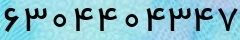

In [20]:
img = cv2.imread('/content/data/0.jpg')
cv2_imshow(img)

In [18]:
import shutil
shutil.move('/content/valid.txt' , '/content/data')

'/content/data/valid.txt'

In [20]:
!cp '/content/data' -r '/content/drive/MyDrive'

In [21]:
from glob import glob
len(glob('/content/drive/MyDrive/data/train/*'))

1659

In [31]:
!rm -rf /content/drive/MyDrive/save_model_ABINet